In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f
from scipy.stats import kstest
from scipy.stats import chisquare
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2


In [44]:
statistics = [-1.467, -2.177, -2.085, -3.011, -2.178, -2.936, -0.980, -1.800, -0.786, -2.205,
              -2.975, -1.854, -2.189, -2.431, -2.867, -1.641, -0.876, -2.697, -2.799, -2.079,
              -2.052, -2.084, -2.157, -2.558, -2.349, -1.510, -1.249, -0.626, -1.460, -3.119,
              -2.523, -1.489, -3.060, -2.012, -1.694, -0.861, -1.944, -1.863, -2.129, -2.416,
              -1.787, -2.978, -2.909, -1.560, -1.668, -1.683, -1.892, -1.051, -1.896, -1.652,]

In [45]:
n = len(statistics)
a = -2
sigma2 = 0.5
sigma = np.sqrt(sigma2)
epsilon = 0.01

In [46]:
xbar = np.mean(statistics)  #среднее
xbar

-2.00528

In [47]:
S = 0
for i in range (0, n):                      #среднее квадратичное
    S += (statistics[i] - xbar) ** 2 / n
S

0.4111217615999999

### a) Параметр $\sigma^2$ известен

##### $G(\alpha, X)=\sqrt{n}\dfrac{\overline X-a}{\sigma}$

In [48]:
quantile_norm = norm.ppf(1 - epsilon/2)      #квантиль среднего нормального распределения
quantile_norm

2.5758293035489004

In [49]:
teta_minus = xbar - (quantile_norm * sigma)/np.sqrt(n)
teta_plus = xbar + (quantile_norm * sigma)/np.sqrt(n)

In [50]:
print('(' + str(teta_minus) + ', ' + str(teta_plus) + ')')

(-2.26286293035489, -1.74769706964511)


### б) Параметр $\sigma^2$ неизвестен

##### $ G(\alpha, X)=\sqrt{n}\dfrac{\overline X-a}{S_0}$

In [51]:
quantile_student = t.ppf(1 - epsilon/2, n - 1)     #квантиль распределения стьюдента
quantile_student

2.67995197363155

In [52]:
S0 = n * S / (n - 1)        #на самом деле квадрат S0
S0

0.41951200163265295

In [53]:
teta_minus = xbar - (quantile_student * np.sqrt(S0))/np.sqrt(n)
teta_plus = xbar + (quantile_student * np.sqrt(S0))/np.sqrt(n)

In [54]:
print('(' + str(teta_minus) + ', ' + str(teta_plus) + ')')

(-2.2507589200788742, -1.7598010799211254)


### в) Параметр $a$ известен

##### $ G(\sigma, X)=n\dfrac{{S_1}^2}{\sigma^2}$

In [55]:
chi2_minus = chi2.ppf(1 - epsilon/2, n)
chi2_plus = chi2.ppf(epsilon/2, n)
print(str(chi2_minus) + ' ' + str(chi2_plus))

79.48997846682893 27.990748866373313


In [56]:
S1 = 0
for i in range (0, n):
    S1 += (statistics[i] - a) ** 2 / n
S1

0.41114964000000015

In [57]:
teta_minus = n * S1 / chi2_minus
teta_plus = n * S1 / chi2_plus

In [58]:
print('(' + str(teta_minus) + ', ' + str(teta_plus) + ')')

(0.25861727976915505, 0.7344384424346981)


### г) Параметр $a$ неизвестен

##### $ G(\sigma, X)=n\dfrac{{S}^2}{\sigma^2}$

In [59]:
chi2_minus = chi2.ppf(1 - epsilon/2, n - 1)
chi2_plus = chi2.ppf(epsilon/2, n - 1)
print(str(chi2_minus) + ' ' + str(chi2_plus))

78.23070808668994 27.24934906956969


In [60]:
teta_minus = n * S / chi2_minus
teta_plus = n * S / chi2_plus

In [61]:
print('(' + str(teta_minus) + ', ' + str(teta_plus) + ')')

(0.26276239321803324, 0.7543698760480009)


# Задание 2

### а) Проверить гипотезу о совпадении дисперсий при неизвестных средних

In [62]:
statistics_20 = statistics[:20]
n = len(statistics_20)

In [63]:
statistics_30 = statistics[20:]
m = len(statistics_30)

In [64]:
xbar = np.mean(statistics_20)
xbar

-2.1016500000000002

In [65]:
ybar = np.mean(statistics_30)
ybar

-1.9410333333333334

In [66]:
S0_X = 0
for i in range (0, n):
    S0_X += (statistics_20[i] - xbar) ** 2 / (n - 1)
print(S0_X)

0.4794700289473684


In [67]:
S0_Y = 0
for i in range (0, len(statistics_30)):
    S0_Y += (statistics_30[i] - ybar) ** 2 / (m - 1)
print(S0_Y)

0.3840201712643678


In [68]:
ro = S0_X/S0_Y    
ro  

1.2485542813252142

In [69]:
q_left = f.ppf(epsilon/2, n - 1, m - 1)
q_left

0.3104324838956508

In [70]:
q_right = f.ppf(1 - epsilon/2, n - 1, m - 1)
q_right

2.8847355410834554

In [71]:
if (q_left < ro and ro < q_right):
    print('Основная гипотеза принимается критерием Фишера')
else:
    print('Основная гипотеза отвергается критерием Фишера')

Основная гипотеза принимается критерием Фишера


### б) Проверить гипотезу о совпадении средних, если известно, что неизвестные дисперсии совпадают

In [72]:
d = np.sqrt(n * m / (n + m)) * (xbar - ybar) / np.sqrt(((n - 1) * S0_X + (m - 1) * S0_Y) / (n + m - 2))
abs_d = np.abs(d)
print(abs_d)

0.856695932620391


In [73]:
t = t.ppf(1 - epsilon/2, n + m - 2)   
t

2.6822040269502136

In [74]:
if (t > abs_d):
    print('Критерий Стьюдента принимает основную гипотезу')
else:
    print('Критерий Стьюдента отвергает основную гипотезу')

Критерий Стьюдента принимает основную гипотезу


# Задание 3

In [75]:
statistics30 = np.array([0.138, 0.450, 0.569, 0.459, 0.046, 0.281, 0.280, 0.282, 0.006, 0.879,
                         0.135, 0.228, 0.756, 0.009, 0.064, 0.156, 0.357, 0.545, 0.031, 0.682,
                         0.639, 0.143, 0.645, 0.195, 0.977, 0.582, 0.011, 0.016, 0.764, 0.533,])

In [76]:
def Fn(y):
    return (statistics30 < y).sum() / 30

In [77]:
def F(y):
    return y

In [78]:
statistics_sorted = np.sort(statistics30)

In [79]:
Fn_values = []
for y in statistics_sorted:
    Fn_values.append(Fn(y))
Fn_values = np.array(Fn_values)

In [80]:
F_values = []
for y in statistics_sorted:
    F_values.append(F(y))
F_values = np.array(F_values)

ValueError: could not broadcast input array from shape (32) into shape (31)

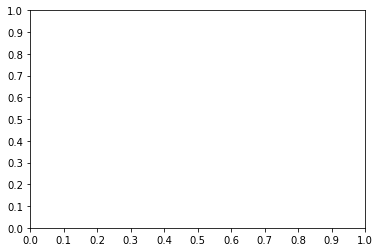

In [81]:
x_axis = statistics_sorted
y_axis = Fn_values

y_axis2 = F_values

x_axis = np.append(x_axis, 1)
y_axis = np.append(y_axis, 1)
y_axis2 = np.append(y_axis2, 1)

x_axis = np.insert(x_axis, 0, 0, axis=0)
y_axis2 = np.insert(y_axis2, 0, 0, axis=0)

x_min = x_axis
x_max = x_min[1:]
x_max = np.append(x_max, 1)


fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(0, 1.1, 0.1))

plt.hlines(y_axis, x_min, x_max)
plt.plot(x_axis, y_axis2)
plt.grid()
plt.show

# Задание 4

### a) Критерий Колмогорова

In [ ]:
d = 0
fni = 0
fi = 0
for y in statistics30:
    if (np.abs(Fn(y) - F(y)) > d):
        d = np.abs(Fn(y) - F(y))
        fni = Fn(y)
        fi = F(y)
d

In [ ]:
print(str(fni) + ' ' + str(fi))

In [ ]:
d = np.sqrt(30) * d
d

In [ ]:
pval = 1 - 0.8823      #Это Реально достигнутый уровень значимости
pval

In [ ]:
if (pval > 0.1):
    print("Критерий Колмогорова принимает основную гипотезу")
elif (pval < 0.05):
    print("Критерий Колмогорова отвергает основную гипотезу")

### б) Критерий Пирсона Хи-квадрат

In [ ]:
 k = 5

In [ ]:
delta = []
for i in range (k + 1):
    delta.append(i * 1/k)
delta = np.array(delta)
print(delta)

In [ ]:
prob = []
for i in range (1, k + 1):
    prob.append(F(delta[i]) - F(delta[i - 1]))
prob = np.array(prob)
print(prob)

In [ ]:
v = []
for i in range (1, k + 1):
    sum = 0
    for elem in statistics30:
        if (elem >= delta[i - 1] and elem < delta[i]):
            sum += 1
    v.append(sum)
v = np.array(v)
print(v)

In [ ]:
hi2 = 0
for i in range (k):
    hi2 += ((v[i] - 30 * prob[i]) ** 2) / (30 * prob[i])
    print(30 * prob[i])
print(hi2)

In [ ]:
pval = chi2.cdf(hi2, k - 1)  
rduz = 2*(1-pval)                     #Это Реально достигнутый уровень значимости
pval

In [ ]:
rduz

In [ ]:
if (rduz > 0.1):
    print("Критерий Пирсона принимает основную гипотезу")
elif (rduz < 0.05):
    print("Критерий Пирсона отвергает основную гипотезу")